# Prétraitement des Images

## Application de divers filtres pour débruiter les images et calcul des métriques 

In [2]:
import os
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error, structural_similarity

# Fonction pour appliquer divers filtres et calculer les métriques
def apply_filter_and_calculate_metrics(image, filter_type):
    if filter_type == 'median':
        filtered_image = cv2.medianBlur(image, 5)
    elif filter_type == 'gaussian':
        filtered_image = cv2.GaussianBlur(image, (5, 5), 0)
    elif filter_type == 'average':
        filtered_image = cv2.blur(image, (5, 5))
    elif filter_type == 'bilateral':
        filtered_image = cv2.bilateralFilter(image, 9, 75, 75)
    else:
        raise ValueError("Invalid filter type")
    
    psnr = peak_signal_noise_ratio(image, filtered_image)
    mse = mean_squared_error(image, filtered_image)
    mae = np.mean(np.abs(image - filtered_image))
    mssim = structural_similarity(image, filtered_image, win_size=3, channel_axis=2)
    
    return filtered_image, psnr, mse, mae, mssim

# Chemin d'entrée et de sortie
input_folder = "frotis"
output_folders = {
    "median": "filtres/Filtre_Median",
    "gaussian": "filtres/Filtre_Gaussienne",
    "average": "filtres/Filtre_Moyenne",
    "bilateral": "filtres/Filtre_Bilaterale"
}

# Assurez-vous que les dossiers de sortie existent
for folder in output_folders.values():
    if not os.path.exists(folder):
        os.makedirs(folder)

# Initialiser des dictionnaires pour stocker les métriques
metrics = {key: {"psnr": [], "mse": [], "mae": [], "mssim": []} for key in output_folders}

# Parcourir toutes les images dans le dossier d'entrée
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Charger l'image
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)

        # Vérifier si l'image est chargée correctement
        if image is None:
            print(f"Erreur: impossible de charger l'image {filename}.")
            continue

        # Appliquer chaque filtre et calculer les métriques
        for filter_type in output_folders.keys():
            filtered_image, psnr, mse, mae, mssim = apply_filter_and_calculate_metrics(image, filter_type)

            # Enregistrer l'image filtrée dans le dossier de sortie correspondant
            output_path = os.path.join(output_folders[filter_type], filename)
            cv2.imwrite(output_path, filtered_image)

            # Ajouter les métriques à la liste
            metrics[filter_type]["psnr"].append(psnr)
            metrics[filter_type]["mse"].append(mse)
            metrics[filter_type]["mae"].append(mae)
            metrics[filter_type]["mssim"].append(mssim)

            # Afficher les métriques
            print(f"Image: {filename}, Filtre: {filter_type}")
            print(f"PSNR: {psnr:.2f} dB")
            print(f"MSE: {mse:.2f}")
            print(f"MAE: {mae:.2f}")
            print(f"MSSIM: {mssim:.2f}\n")

# Calculer les moyennes des métriques pour chaque filtre
avg_metrics = {key: {metric: np.mean(values) for metric, values in metrics[key].items()} for key in metrics}

# Afficher les moyennes des métriques pour chaque filtre
for filter_type, values in avg_metrics.items():
    print(f"Moyenne des métriques pour le filtre {filter_type.capitalize()}:")
    print(f"PSNR moyen: {values['psnr']:.2f} dB")
    print(f"MSE moyen: {values['mse']:.2f}")
    print(f"MAE moyen: {values['mae']:.2f}")
    print(f"MSSIM moyen: {values['mssim']:.2f}\n")


Image: Opta-Tech_345.jpg, Filtre: median
PSNR: 47.78 dB
MSE: 1.08
MAE: 68.83
MSSIM: 0.99

Image: Opta-Tech_345.jpg, Filtre: gaussian
PSNR: 50.30 dB
MSE: 0.61
MAE: 56.92
MSSIM: 0.99

Image: Opta-Tech_345.jpg, Filtre: average
PSNR: 47.24 dB
MSE: 1.23
MAE: 76.41
MSSIM: 0.99

Image: Opta-Tech_345.jpg, Filtre: bilateral
PSNR: 45.10 dB
MSE: 2.01
MAE: 87.88
MSSIM: 0.98

Image: Opta-Tech_343.jpg, Filtre: median
PSNR: 46.86 dB
MSE: 1.34
MAE: 73.29
MSSIM: 0.98

Image: Opta-Tech_343.jpg, Filtre: gaussian
PSNR: 49.49 dB
MSE: 0.73
MAE: 62.47
MSSIM: 0.99

Image: Opta-Tech_343.jpg, Filtre: average
PSNR: 46.27 dB
MSE: 1.54
MAE: 81.31
MSSIM: 0.98

Image: Opta-Tech_343.jpg, Filtre: bilateral
PSNR: 44.08 dB
MSE: 2.54
MAE: 91.97
MSSIM: 0.98

Image: Opta-Tech_396.jpg, Filtre: median
PSNR: 46.14 dB
MSE: 1.58
MAE: 76.85
MSSIM: 0.98

Image: Opta-Tech_396.jpg, Filtre: gaussian
PSNR: 48.94 dB
MSE: 0.83
MAE: 66.53
MSSIM: 0.99

Image: Opta-Tech_396.jpg, Filtre: average
PSNR: 45.59 dB
MSE: 1.79
MAE: 85.00
MSSIM: 0

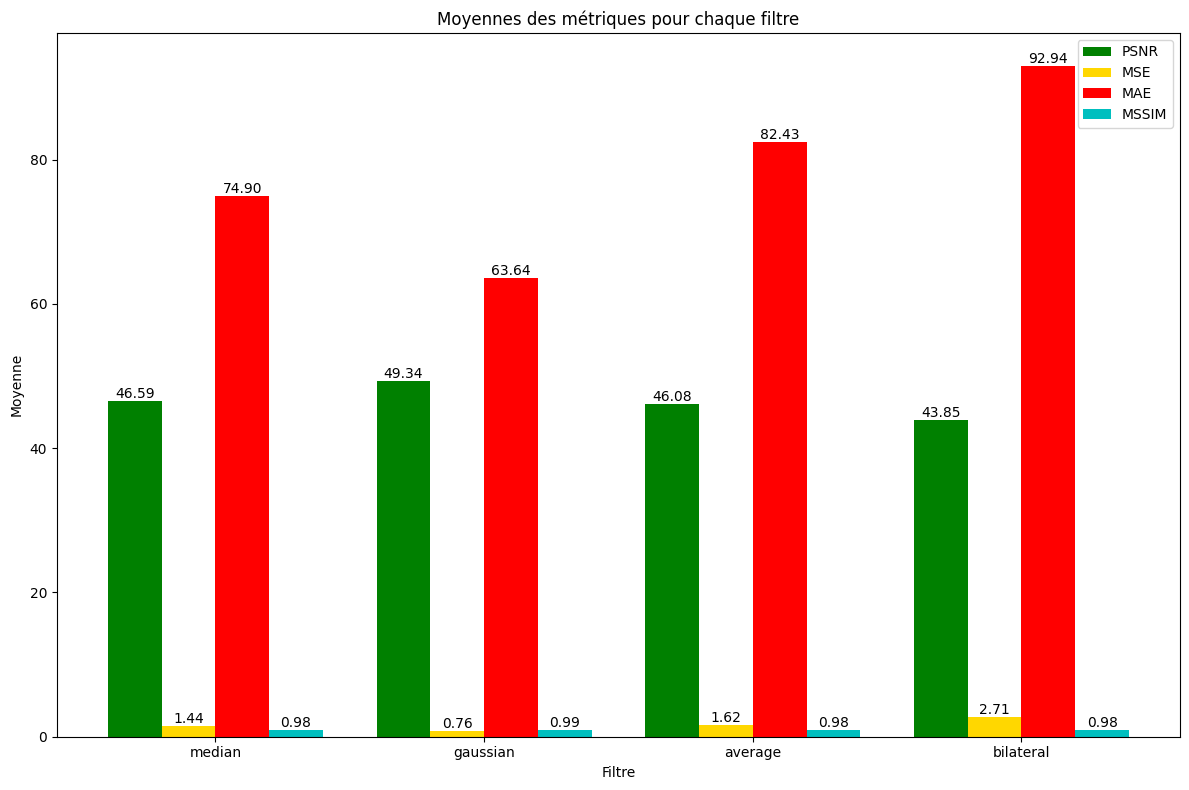

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Préparer les données pour les graphiques
filters = ['median', 'gaussian', 'average', 'bilateral']
psnr_means = [avg_metrics[filter_type]['psnr'] for filter_type in filters]
mse_means = [avg_metrics[filter_type]['mse'] for filter_type in filters]
mae_means = [avg_metrics[filter_type]['mae'] for filter_type in filters]
mssim_means = [avg_metrics[filter_type]['mssim'] for filter_type in filters]

# Largeur des barres
bar_width = 0.2
index = np.arange(len(filters))

# Tracer le graphique
plt.figure(figsize=(12, 8))

bars1 = plt.bar(index - bar_width, psnr_means, bar_width, label='PSNR', color='green')
bars2 = plt.bar(index, mse_means, bar_width, label='MSE', color='gold')
bars3 = plt.bar(index + bar_width, mae_means, bar_width, label='MAE', color='r')
bars4 = plt.bar(index + 2*bar_width, mssim_means, bar_width, label='MSSIM', color='c')

# Ajouter les valeurs des métriques au-dessus de chaque barre
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.xlabel('Filtre')
plt.ylabel('Moyenne')
plt.title('Moyennes des métriques pour chaque filtre')
plt.xticks(index + bar_width / 2, filters)
plt.legend()
plt.tight_layout()
plt.show()


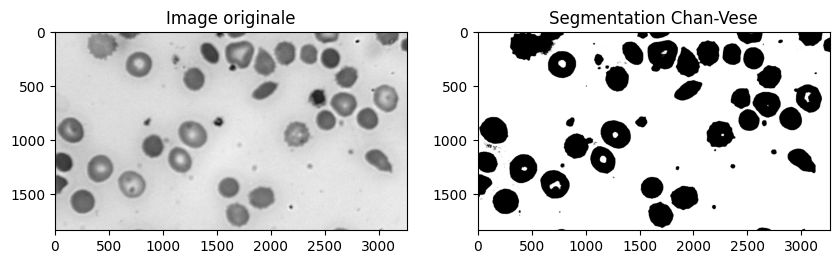

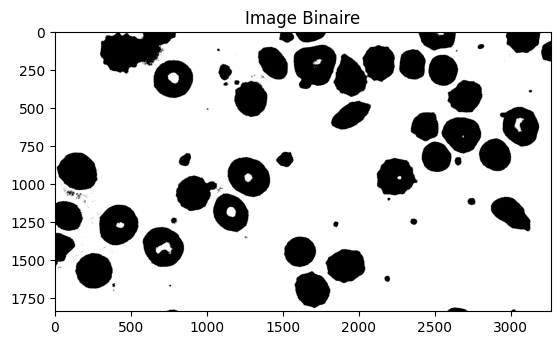

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.segmentation import chan_vese

# Charger l'image
image_path = 'frotis/Opta-Tech_341.jpg'
image = io.imread(image_path)
image_gray = color.rgb2gray(image)

# Appliquer la segmentation Chan-Vese
cv_result = chan_vese(image_gray, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_num_iter=200, dt=0.5, init_level_set="checkerboard", extended_output=True)

# Afficher le résultat de la segmentation
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title('Image originale')
ax[1].imshow(cv_result[0], cmap='gray')
ax[1].set_title('Segmentation Chan-Vese')
plt.show()

# Binariser l'image segmentée
binary_image = cv2.threshold(cv_result[0].astype(np.uint8), 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# Afficher l'image binaire
plt.imshow(binary_image, cmap='gray')
plt.title('Image Binaire')
plt.show()


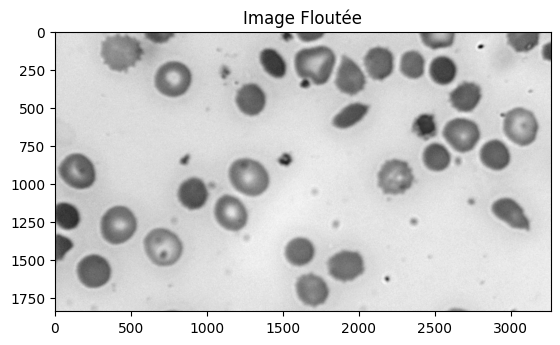

In [8]:
# Charger l'image
image_path = 'frotis/Opta-Tech_341.jpg'
image = cv2.imread(image_path)

# Convertir en niveaux de gris
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer un filtre Gaussien pour réduire le bruit
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Afficher l'image floutée
plt.imshow(blurred, cmap='gray')
plt.title('Image Floutée')
plt.show()

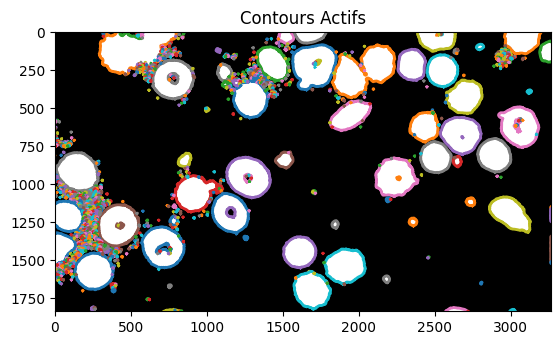

In [9]:
from skimage import measure

# Convertir en niveaux de gris
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer le filtre Gaussien
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Appliquer le seuillage
_, binary = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY_INV)

# Trouver les contours avec contours actifs
contours = measure.find_contours(binary, 0.8)

# Afficher les résultats
fig, ax = plt.subplots()
ax.imshow(binary, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.set_title('Contours Actifs')
plt.show()


# Comparaison des algo

## Segmentation par Seuillage Otsu

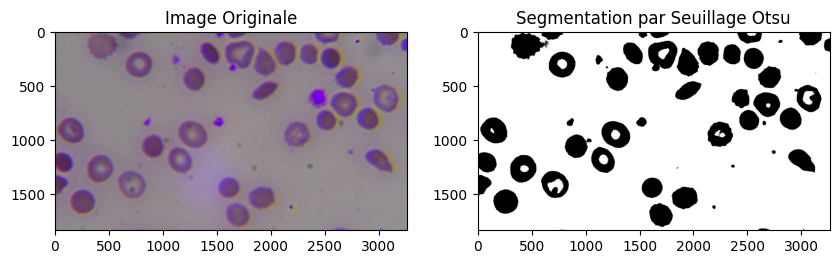

In [10]:
import cv2
import matplotlib.pyplot as plt

def otsu_thresholding(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    binary_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)
    return binary_image

# Example usage
image_path = 'frotis/Opta-Tech_341.jpg'
image = cv2.imread(image_path)
binary_image = otsu_thresholding(image)
cv2.imwrite('output/otsu_thresholding.jpg', binary_image)

# Afficher l'image originale et l'image segmentée
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image Originale')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Segmentation par Seuillage Otsu')

plt.show()


## Segmentation par Chan-Vese

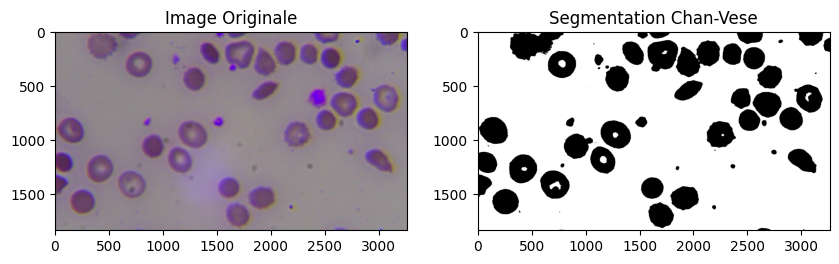

In [11]:
from skimage import color
from skimage.segmentation import chan_vese
import os
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error, structural_similarity

def chan_vese_segmentation(image):
    gray_image = color.rgb2gray(image)
    cv_result = chan_vese(gray_image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_num_iter=200, dt=0.5, init_level_set="checkerboard", extended_output=True)
    segmented_image = (cv_result[0] * 255).astype(np.uint8)
    segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_GRAY2BGR)  # Convert to 3 channels
    return segmented_image

# Example usage
segmented_image = chan_vese_segmentation(image)
cv2.imwrite('output/chan_vese.jpg', (segmented_image * 255).astype(np.uint8))

# Afficher l'image originale et l'image segmentée
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image Originale')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmentation Chan-Vese')

plt.show()


## Segmentation par Contours Actifs

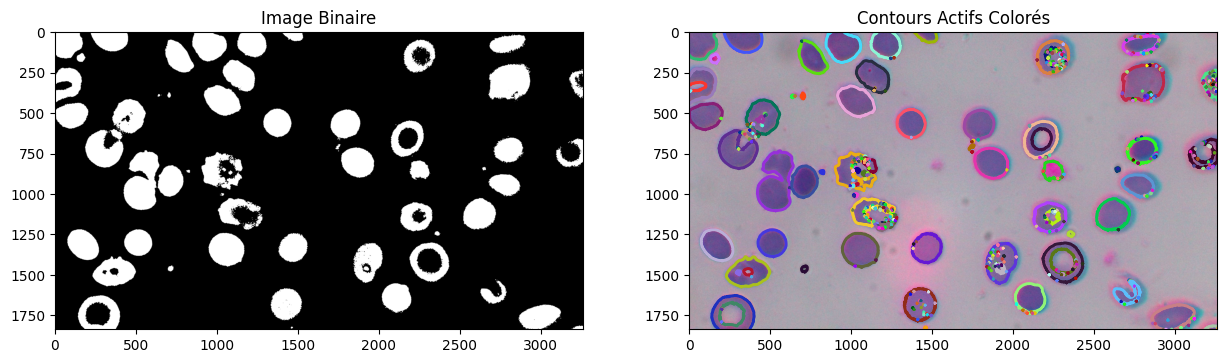

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

def active_contours_segmentation(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    _, binary_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY_INV)
    contours = measure.find_contours(binary_image, 0.8)
    binary_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)  # Convert to 3 channels
    return contours, binary_image

# Example usage
image_path = 'frotis/Opta-Tech_433.jpg'
image = cv2.imread(image_path)
contours, binary_image = active_contours_segmentation(image)
cv2.imwrite('output/active_contours.jpg', binary_image)

# Afficher l'image originale et l'image segmentée avec contours colorés
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# Afficher l'image binaire
ax[0].imshow(binary_image, cmap=plt.cm.gray)
ax[0].set_title('Image Binaire')

# Afficher l'image avec contours actifs colorés
ax[1].imshow(image, cmap=plt.cm.gray)

# Générer une couleur différente pour chaque contour
for contour in contours:
    color = np.random.rand(3,)
    ax[1].plot(contour[:, 1], contour[:, 0], linewidth=2, color=color)

ax[1].set_title('Contours Actifs Colorés')
plt.show()


## Segmentation par K-means

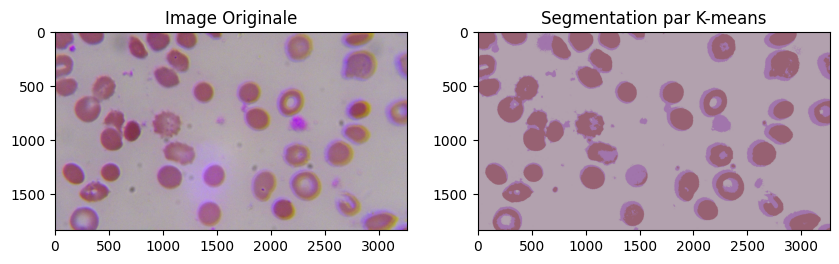

In [13]:
def kmeans_segmentation(image, k=3):
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    return segmented_image

# Example usage
segmented_image = kmeans_segmentation(image)
cv2.imwrite('output/kmeans.jpg', segmented_image)

# Afficher l'image originale et l'image segmentée
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image Originale')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('Segmentation par K-means')

plt.show()


## Segmentation par Mean Shift

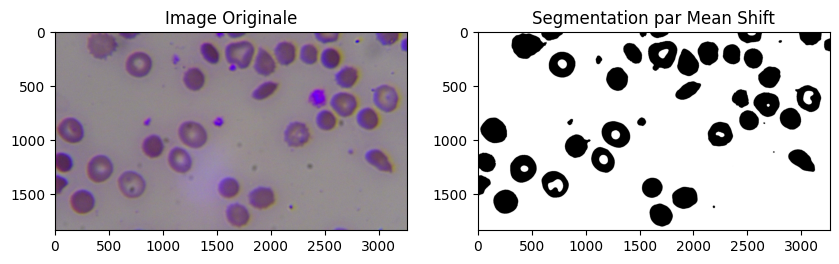

In [14]:
def mean_shift_segmentation(image):
    # Appliquer le filtre Mean Shift
    shifted = cv2.pyrMeanShiftFiltering(image, sp=21, sr=51)
    
    # Convertir l'image filtrée en niveaux de gris
    gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
    
    # Appliquer le seuillage pour obtenir une image binaire
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    # Convertir en image 3 canaux pour correspondre à l'image originale
    binary = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)
    return binary

# Example usage
image_path = 'frotis/Opta-Tech_341.jpg'
image = cv2.imread(image_path)
segmented_image = mean_shift_segmentation(image)
cv2.imwrite('output/mean_shift.jpg', segmented_image)

# Afficher l'image originale et l'image segmentée
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image Originale')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('Segmentation par Mean Shift')

plt.show()


## Segmentation par Graph Cut

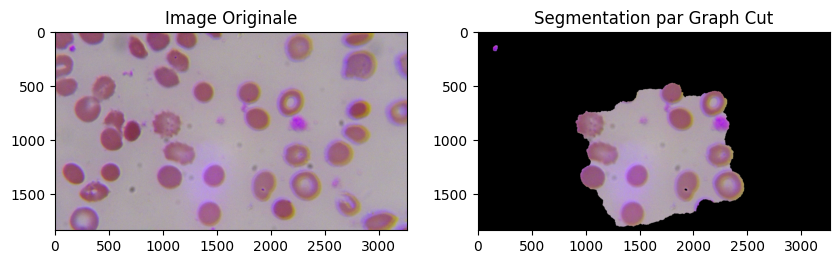

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def graph_cut_segmentation(image, scale=0.5):
    # Redimensionner l'image pour accélérer le processus
    height, width = image.shape[:2]
    small_image = cv2.resize(image, (int(width * scale), int(height * scale)))

    # Appliquer Graph Cut sur l'image redimensionnée
    mask = np.zeros(small_image.shape[:2], np.uint8)
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)
    rect = (10, 10, small_image.shape[1] - 20, small_image.shape[0] - 20)
    cv2.grabCut(small_image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    small_segmented_image = small_image * mask2[:, :, np.newaxis]

    # Redimensionner l'image segmentée à sa taille d'origine
    segmented_image = cv2.resize(small_segmented_image, (width, height))
    return segmented_image

# Example usage
image_path = 'frotis/Opta-Tech_433.jpg'
image = cv2.imread(image_path)
segmented_image = graph_cut_segmentation(image, scale=0.5)
cv2.imwrite('output/graph_cut.jpg', segmented_image)

# Afficher l'image originale et l'image segmentée
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image Originale')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('Segmentation par Graph Cut')

plt.show()


## Fonction de Comparaison des Algorithmes

Results for Otsu:
PSNR: 6.99 dB
MSE: 13018.33
MAE: 133.46
MSSIM: 0.66

Results for Chan-Vese:
PSNR: 7.00 dB
MSE: 12964.25
MAE: 133.43
MSSIM: 0.63

Results for Active Contours:
PSNR: 5.02 dB
MSE: 20466.32
MAE: 132.89
MSSIM: 0.15

Results for K-means:
PSNR: 27.60 dB
MSE: 112.93
MAE: 64.11
MSSIM: 0.95

Results for Mean Shift:
PSNR: 6.97 dB
MSE: 13052.60
MAE: 133.47
MSSIM: 0.66

Results for Graph Cut:
PSNR: 7.95 dB
MSE: 10421.72
MAE: 79.76
MSSIM: 0.37



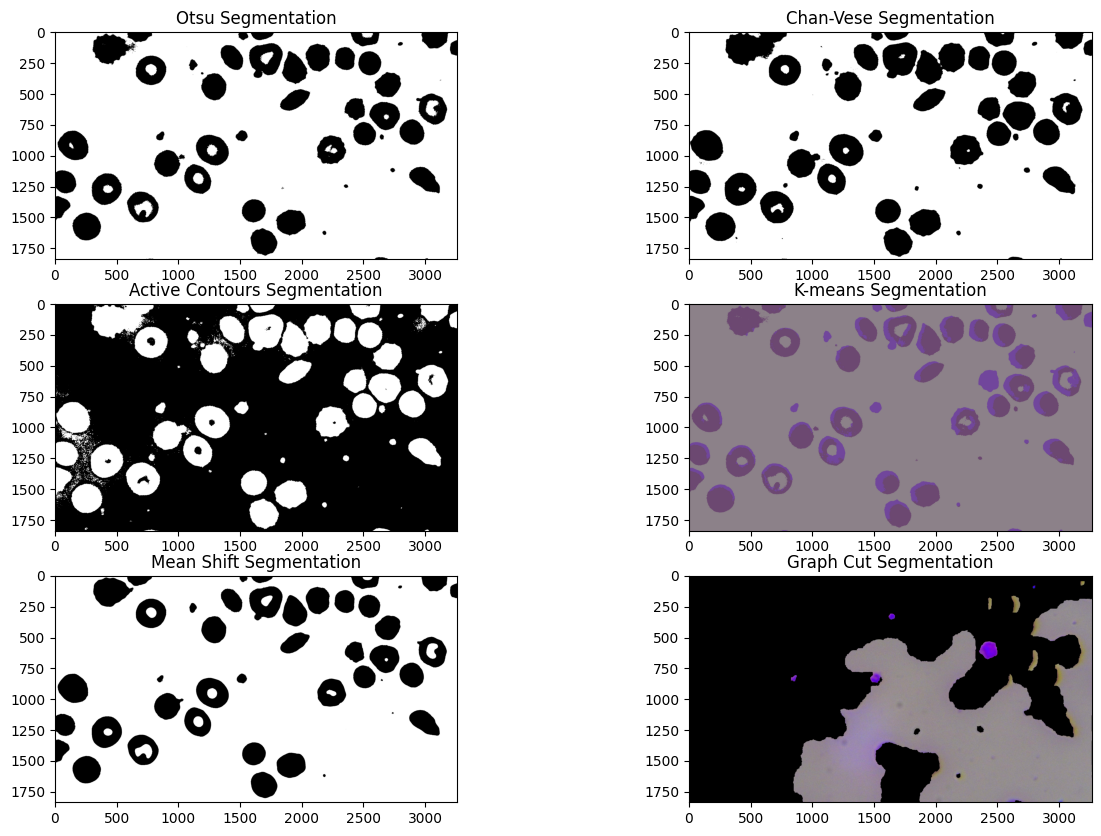

In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error, structural_similarity
from skimage import color
from skimage.segmentation import chan_vese
from skimage import measure

# Segmentation par Seuillage Otsu
def otsu_thresholding(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    binary_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)  # Convert to 3 channels
    return binary_image

# Segmentation par Chan-Vese
def chan_vese_segmentation(image):
    gray_image = color.rgb2gray(image)
    cv_result = chan_vese(gray_image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_num_iter=200, dt=0.5, init_level_set="checkerboard", extended_output=True)
    segmented_image = (cv_result[0] * 255).astype(np.uint8)
    segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_GRAY2BGR)  # Convert to 3 channels
    return segmented_image

# Segmentation par Contours Actifs
def active_contours_segmentation(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    _, binary_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY_INV)
    contours = measure.find_contours(binary_image, 0.8)
    binary_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)  # Convert to 3 channels
    return contours, binary_image

# Segmentation par K-means
def kmeans_segmentation(image, k=3):
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    return segmented_image

# Segmentation par Mean Shift
def mean_shift_segmentation(image):
    # Appliquer le filtre Mean Shift
    shifted = cv2.pyrMeanShiftFiltering(image, sp=21, sr=51)
    
    # Convertir l'image filtrée en niveaux de gris
    gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
    
    # Appliquer le seuillage pour obtenir une image binaire
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    # Convertir en image 3 canaux pour correspondre à l'image originale
    binary = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)
    return binary

# Segmentation par Graph Cut
def graph_cut_segmentation(image):
    mask = np.zeros(image.shape[:2], np.uint8)
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)
    rect = (50, 50, image.shape[1] - 50, image.shape[0] - 50)
    cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    segmented_image = image * mask2[:, :, np.newaxis]
    return segmented_image

# Fonction de comparaison des algorithmes de segmentation
def compare_segmentation_algorithms(image_path):
    image = cv2.imread(image_path)
    original_shape = image.shape

    algorithms = {
        'Otsu': otsu_thresholding,
        'Chan-Vese': chan_vese_segmentation,
        'Active Contours': active_contours_segmentation,
        'K-means': kmeans_segmentation,
        'Mean Shift': mean_shift_segmentation,
        'Graph Cut': graph_cut_segmentation
    }

    results = {}
    plt.figure(figsize=(15, 10))
    i = 1

    for name, algorithm in algorithms.items():
        if name == 'Active Contours':
            contours, segmented_image = algorithm(image)
        else:
            segmented_image = algorithm(image)

        # Redimensionner l'image segmentée pour correspondre à l'image originale
        segmented_image_resized = cv2.resize(segmented_image, (original_shape[1], original_shape[0]))

        # Calcul des métriques
        psnr = peak_signal_noise_ratio(image, segmented_image_resized)
        mse = mean_squared_error(image, segmented_image_resized)
        mae = np.mean(np.abs(image - segmented_image_resized))
        mssim = structural_similarity(image, segmented_image_resized, win_size=3, channel_axis=2)

        results[name] = {
            'PSNR': psnr,
            'MSE': mse,
            'MAE': mae,
            'MSSIM': mssim
        }
        output_path = f'output/{name.lower().replace(" ", "_")}.jpg'
        cv2.imwrite(output_path, segmented_image_resized)

        print(f"Results for {name}:")
        print(f"PSNR: {psnr:.2f} dB")
        print(f"MSE: {mse:.2f}")
        print(f"MAE: {mae:.2f}")
        print(f"MSSIM: {mssim:.2f}\n")

        plt.subplot(3, 2, i)
        plt.imshow(cv2.cvtColor(segmented_image_resized, cv2.COLOR_BGR2RGB))
        plt.title(f'{name} Segmentation')
        i += 1

    plt.show()
    return results

# Exemple d'utilisation
results = compare_segmentation_algorithms('frotis/Opta-Tech_341.jpg')


## Représentation Graphique des Résultats

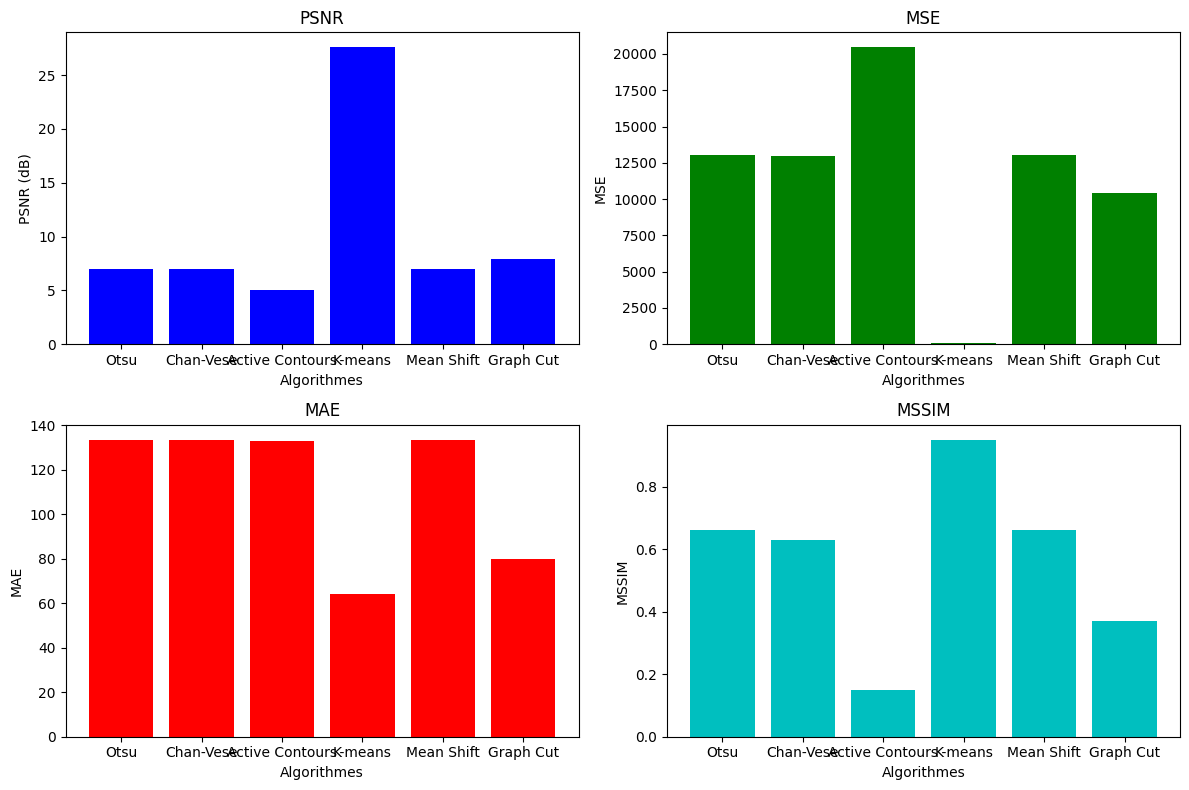

In [1]:
import matplotlib.pyplot as plt

# Noms des algorithmes
algorithms = ['Otsu', 'Chan-Vese', 'Active Contours', 'K-means', 'Mean Shift', 'Graph Cut']

# PSNR
psnr_values = [6.99, 7.00, 5.02, 27.60, 6.97, 7.95]

# MSE
mse_values = [13018.33, 12964.25, 20466.32, 112.93, 13052.60, 10421.72]

# MAE
mae_values = [133.46, 133.43, 132.89, 64.11, 133.47, 79.76]

# MSSIM
mssim_values = [0.66, 0.63, 0.15, 0.95, 0.66, 0.37]

# Tracer les résultats
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(algorithms, psnr_values, color='b')
plt.xlabel('Algorithmes')
plt.ylabel('PSNR (dB)')
plt.title('PSNR')

plt.subplot(2, 2, 2)
plt.bar(algorithms, mse_values, color='g')
plt.xlabel('Algorithmes')
plt.ylabel('MSE')
plt.title('MSE')

plt.subplot(2, 2, 3)
plt.bar(algorithms, mae_values, color='r')
plt.xlabel('Algorithmes')
plt.ylabel('MAE')
plt.title('MAE')

plt.subplot(2, 2, 4)
plt.bar(algorithms, mssim_values, color='c')
plt.xlabel('Algorithmes')
plt.ylabel('MSSIM')
plt.title('MSSIM')

plt.tight_layout()
plt.show()


## Affinement des Algorithmes

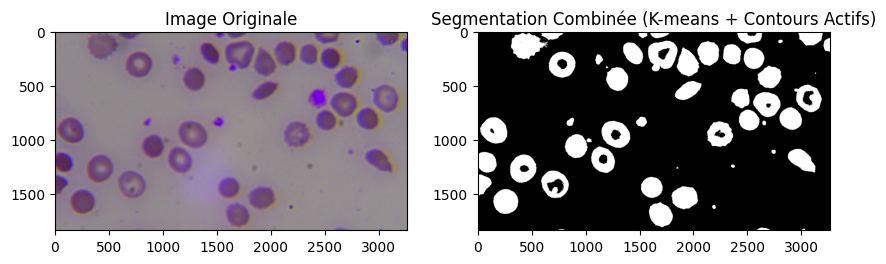

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error, structural_similarity
from skimage import color
from skimage.segmentation import chan_vese, active_contour
from skimage import measure

# Segmentation par K-means
def kmeans_segmentation(image, k=3):
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    return segmented_image

# Segmentation par Contours Actifs
def active_contours_segmentation(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    _, binary_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY_INV)
    contours = measure.find_contours(binary_image, 0.8)
    binary_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)  # Convert to 3 channels
    return contours, binary_image

# Segmentation combinée K-means + Contours Actifs
def combined_segmentation(image):
    # Appliquer K-means
    kmeans_result = kmeans_segmentation(image, k=3)
    
    # Appliquer Contours Actifs sur le résultat de K-means
    gray_kmeans = cv2.cvtColor(kmeans_result, cv2.COLOR_BGR2GRAY)
    blurred_kmeans = cv2.GaussianBlur(gray_kmeans, (5, 5), 0)
    _, binary_kmeans = cv2.threshold(blurred_kmeans, 127, 255, cv2.THRESH_BINARY_INV)
    contours = measure.find_contours(binary_kmeans, 0.8)
    binary_kmeans = cv2.cvtColor(binary_kmeans, cv2.COLOR_GRAY2BGR)
    
    return binary_kmeans

# Exemple d'utilisation
image_path = 'frotis/Opta-Tech_341.jpg'
image = cv2.imread(image_path)
combined_result = combined_segmentation(image)
cv2.imwrite('output/combined_segmentation.jpg', combined_result)

# Afficher l'image originale et le résultat combiné
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image Originale')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(combined_result, cv2.COLOR_BGR2RGB))
plt.title('Segmentation Combinée (K-means + Contours Actifs)')

plt.show()


## 2nd comparaison segmentation_algorithms

Results for Otsu:
PSNR: 6.99 dB
MSE: 13018.33
MAE: 133.46
MSSIM: 0.66

Results for Chan-Vese:
PSNR: 7.00 dB
MSE: 12964.25
MAE: 133.43
MSSIM: 0.63

Results for Active Contours:
PSNR: 5.02 dB
MSE: 20466.32
MAE: 132.89
MSSIM: 0.15

Results for K-means:
PSNR: 27.60 dB
MSE: 112.93
MAE: 64.10
MSSIM: 0.95

Results for Mean Shift:
PSNR: 6.97 dB
MSE: 13052.60
MAE: 133.47
MSSIM: 0.66

Results for Graph Cut:
PSNR: 7.34 dB
MSE: 11997.07
MAE: 90.99
MSSIM: 0.29

Results for Combined:
PSNR: 5.03 dB
MSE: 20441.91
MAE: 132.85
MSSIM: 0.12



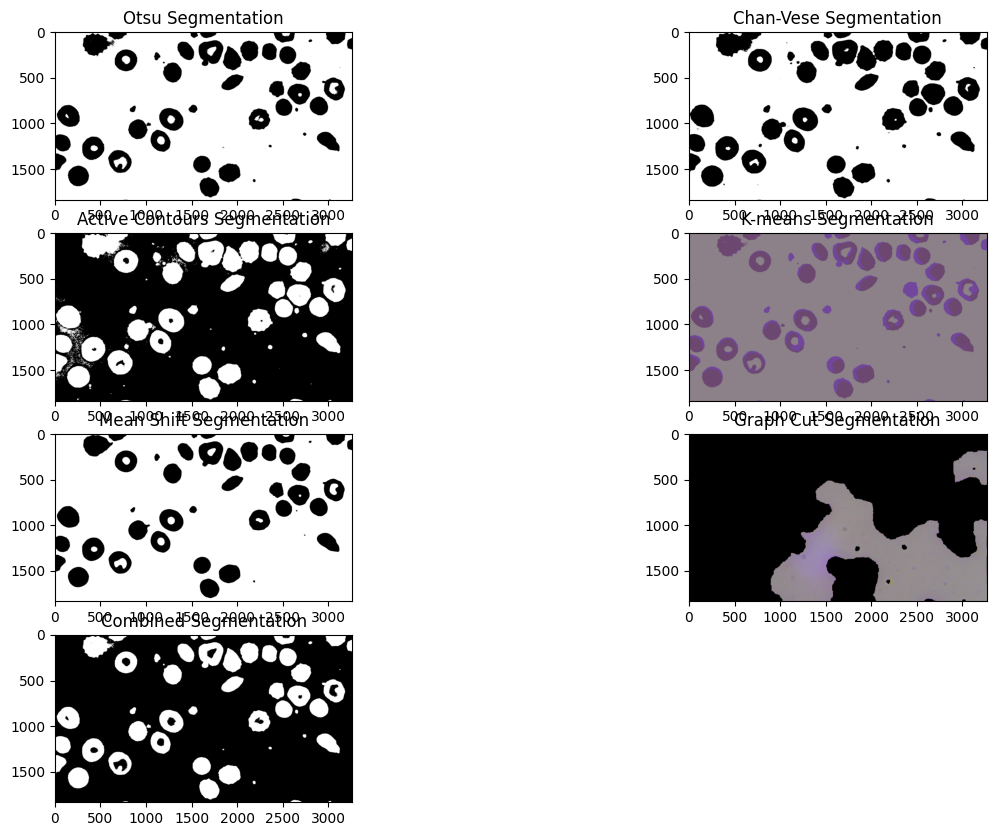

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error, structural_similarity
from skimage import color
from skimage.segmentation import chan_vese
from skimage import measure

# Segmentation par Seuillage Otsu
def otsu_thresholding(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    binary_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)  # Convert to 3 channels
    return binary_image

# Segmentation par Chan-Vese
def chan_vese_segmentation(image):
    gray_image = color.rgb2gray(image)
    cv_result = chan_vese(gray_image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_num_iter=200, dt=0.5, init_level_set="checkerboard", extended_output=True)
    segmented_image = (cv_result[0] * 255).astype(np.uint8)
    segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_GRAY2BGR)  # Convert to 3 channels
    return segmented_image

# Segmentation par Contours Actifs
def active_contours_segmentation(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    _, binary_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY_INV)
    contours = measure.find_contours(binary_image, 0.8)
    binary_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)  # Convert to 3 channels
    return contours, binary_image

# Segmentation par K-means
def kmeans_segmentation(image, k=3):
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    return segmented_image

# Segmentation par Mean Shift
def mean_shift_segmentation(image):
    # Appliquer le filtre Mean Shift
    shifted = cv2.pyrMeanShiftFiltering(image, sp=21, sr=51)
    
    # Convertir l'image filtrée en niveaux de gris
    gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
    
    # Appliquer le seuillage pour obtenir une image binaire
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    # Convertir en image 3 canaux pour correspondre à l'image originale
    binary = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)
    return binary

# Segmentation par Graph Cut
def graph_cut_segmentation(image):
    mask = np.zeros(image.shape[:2], np.uint8)
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)
    rect = (50, 50, image.shape[1] - 50, image.shape[0] - 50)
    cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    segmented_image = image * mask2[:, :, np.newaxis]
    return segmented_image

# Fonction de comparaison des algorithmes de segmentation
def compare_segmentation_algorithms(image_path):
    image = cv2.imread(image_path)
    original_shape = image.shape

    algorithms = {
        'Otsu': otsu_thresholding,
        'Chan-Vese': chan_vese_segmentation,
        'Active Contours': active_contours_segmentation,
        'K-means': kmeans_segmentation,
        'Mean Shift': mean_shift_segmentation,
        'Graph Cut': graph_cut_segmentation,
        'Combined': combined_segmentation  # Ajout de la segmentation combinée
    }

    results = {}
    plt.figure(figsize=(15, 10))
    i = 1

    for name, algorithm in algorithms.items():
        if name == 'Active Contours':
            contours, segmented_image = algorithm(image)
        else:
            segmented_image = algorithm(image)

        # Redimensionner l'image segmentée pour correspondre à l'image originale
        segmented_image_resized = cv2.resize(segmented_image, (original_shape[1], original_shape[0]))

        # Calcul des métriques
        psnr = peak_signal_noise_ratio(image, segmented_image_resized)
        mse = mean_squared_error(image, segmented_image_resized)
        mae = np.mean(np.abs(image - segmented_image_resized))
        mssim = structural_similarity(image, segmented_image_resized, win_size=3, channel_axis=2)

        results[name] = {
            'PSNR': psnr,
            'MSE': mse,
            'MAE': mae,
            'MSSIM': mssim
        }
        output_path = f'output/{name.lower().replace(" ", "_")}.jpg'
        cv2.imwrite(output_path, segmented_image_resized)

        print(f"Results for {name}:")
        print(f"PSNR: {psnr:.2f} dB")
        print(f"MSE: {mse:.2f}")
        print(f"MAE: {mae:.2f}")
        print(f"MSSIM: {mssim:.2f}\n")

        plt.subplot(4, 2, i)
        plt.imshow(cv2.cvtColor(segmented_image_resized, cv2.COLOR_BGR2RGB))
        plt.title(f'{name} Segmentation')
        i += 1

    plt.show()
    return results

# Exemple d'utilisation
results = compare_segmentation_algorithms('frotis/Opta-Tech_341.jpg')


## Post-Processing des Masques de Segmentation

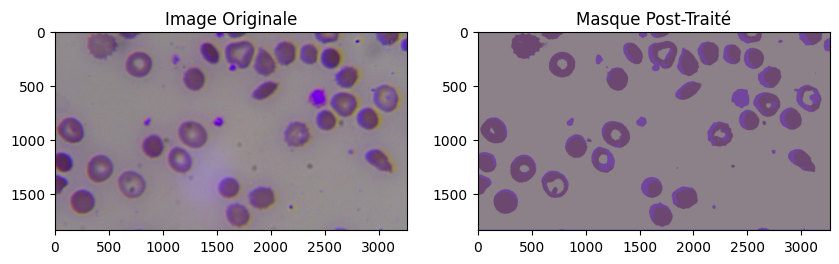

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error, structural_similarity
from skimage import color
from skimage.segmentation import chan_vese
from skimage import measure

# Segmentation par K-means
def kmeans_segmentation(image, k=3):
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    return segmented_image

# Fonction de post-traitement des masques
def post_process_mask(mask):
    # Convertir le masque en niveaux de gris
    gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    kernel = np.ones((3, 3), np.uint8)
    
    # Ouverture morphologique pour enlever le bruit
    opening = cv2.morphologyEx(gray_mask, cv2.MORPH_OPEN, kernel, iterations=2)
    
    # Dilatation pour obtenir des objets plus complets
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    
    # Distance transform
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    
    # Marquage des zones incertaines
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Marquage des objets
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 0] = 0
    
    # Appliquer Watershed
    markers = cv2.watershed(image, markers)
    mask[markers == -1] = [255, 0, 0]
    
    return mask

# Exemple d'utilisation
image_path = 'frotis/Opta-Tech_341.jpg'
image = cv2.imread(image_path)
mask = kmeans_segmentation(image)  # Utilisez l'algorithme de votre choix
post_processed_mask = post_process_mask(mask)
cv2.imwrite('output/post_processed_mask.jpg', post_processed_mask)

# Afficher l'image originale et le masque post-traité
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image Originale')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(post_processed_mask, cv2.COLOR_BGR2RGB))
plt.title('Masque Post-Traité')

plt.show()


## Analyse Quantitative des Segmentation

In [5]:
import cv2
import numpy as np

def analyze_segmentation(mask):
    gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    contours, _ = cv2.findContours(gray_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    analysis_results = []
    for contour in contours:
        if len(contour) >= 5:
            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)
            ellipse = cv2.fitEllipse(contour)
            major_axis = max(ellipse[1])
            minor_axis = min(ellipse[1])
            
            if minor_axis == 0:
                aspect_ratio = float('inf')  # Ou une autre valeur pour indiquer l'infini
            else:
                aspect_ratio = major_axis / minor_axis
            
            analysis_results.append({
                'Area': area,
                'Perimeter': perimeter,
                'Aspect Ratio': aspect_ratio
            })
    return analysis_results

# Exemple d'utilisation
mask_path = 'output/combined_segmentation.jpg'
mask = cv2.imread(mask_path)
analysis_results = analyze_segmentation(mask)

for i, result in enumerate(analysis_results):
    print(f"Object {i+1}: Area={result['Area']}, Perimeter={result['Perimeter']}, Aspect Ratio={result['Aspect Ratio']}")


Object 1: Area=438.5, Perimeter=217.37972354888916, Aspect Ratio=3.7827594761711745
Object 2: Area=0.5, Perimeter=20.727921843528748, Aspect Ratio=1.3768936851920772
Object 3: Area=317.0, Perimeter=194.79393661022186, Aspect Ratio=1.500044301740936
Object 4: Area=0.0, Perimeter=8.485281229019165, Aspect Ratio=1.1275491994869766e+17
Object 5: Area=6.0, Perimeter=20.14213538169861, Aspect Ratio=1.9110183173872695
Object 6: Area=0.0, Perimeter=10.485281229019165, Aspect Ratio=inf
Object 7: Area=1825.5, Perimeter=475.0020874738693, Aspect Ratio=1.752147462348624
Object 8: Area=2.0, Perimeter=13.313708305358887, Aspect Ratio=1.1276884374766851
Object 9: Area=2.0, Perimeter=13.313708305358887, Aspect Ratio=1.1276884374766851
Object 10: Area=0.0, Perimeter=7.656854152679443, Aspect Ratio=1.415364420341379
Object 11: Area=0.5, Perimeter=11.071067690849304, Aspect Ratio=2.2848052760057023
Object 12: Area=0.0, Perimeter=6.828427076339722, Aspect Ratio=2.2366129067772693
Object 13: Area=1.5, Peri

## Validation Manuelle

In [6]:
def validate_segmentation(segmented_mask, ground_truth_mask):
    gray_segmented = cv2.cvtColor(segmented_mask, cv2.COLOR_BGR2GRAY)
    gray_truth = cv2.cvtColor(ground_truth_mask, cv2.COLOR_BGR2GRAY)
    
    overlap = cv2.bitwise_and(gray_segmented, gray_truth)
    accuracy = np.sum(overlap) / np.sum(gray_truth)
    
    return accuracy

# Exemple d'utilisation
ground_truth_path = 'frotis/Opta-Tech_341.jpg'
ground_truth_mask = cv2.imread(ground_truth_path)
accuracy = validate_segmentation(post_processed_mask, ground_truth_mask)
print(f"Segmentation Accuracy: {accuracy * 100:.2f}%")



Segmentation Accuracy: 87.75%


## Ajustement Methode de validation et pipeline de validation final

Segmentation Accuracy: 92.92%


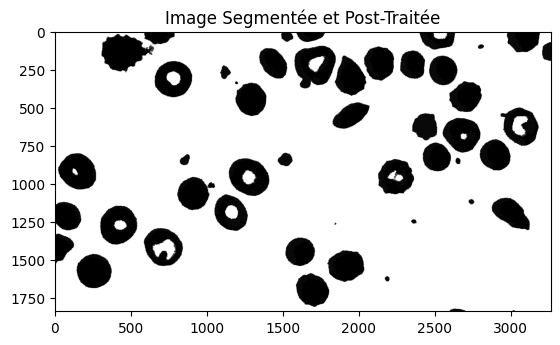

In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, color
from skimage.segmentation import chan_vese

# Définir les fonctions de segmentation
def otsu_thresholding(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    binary_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)  # Convert to 3 channels
    return binary_image

def chan_vese_segmentation(image):
    gray_image = color.rgb2gray(image)
    cv_result = chan_vese(gray_image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_num_iter=200, dt=0.5, init_level_set="checkerboard", extended_output=True)
    segmented_image = (cv_result[0] * 255).astype(np.uint8)
    segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_GRAY2BGR)  # Convert to 3 channels
    return segmented_image

def kmeans_segmentation(image, k=3):
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    return segmented_image

# Fonction de segmentation combinée
def combined_segmentation(image):
    otsu_mask = otsu_thresholding(image)
    chan_vese_mask = chan_vese_segmentation(image)
    kmeans_mask = kmeans_segmentation(image)
    
    combined_mask = cv2.bitwise_or(otsu_mask, chan_vese_mask)
    combined_mask = cv2.bitwise_or(combined_mask, kmeans_mask)
    
    return combined_mask

# Fonction de post-traitement
def post_process_mask(mask):
    gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    kernel = np.ones((3, 3), np.uint8)
    cleaned_mask = cv2.morphologyEx(gray_mask, cv2.MORPH_OPEN, kernel, iterations=2)
    cleaned_mask = cv2.morphologyEx(cleaned_mask, cv2.MORPH_CLOSE, kernel, iterations=2)
    return cleaned_mask

# Fonction d'analyse quantitative
def analyze_segmentation(mask):
    contours = measure.find_contours(mask, 0.8)
    results = []
    for contour in contours:
        area = cv2.contourArea(contour.astype(np.int32))
        perimeter = cv2.arcLength(contour.astype(np.int32), True)
        if len(contour) >= 5:  # Minimum number of points to fit ellipse
            _, axes, _ = cv2.fitEllipse(contour.astype(np.int32))
            major_axis = max(axes)
            minor_axis = min(axes)
            aspect_ratio = major_axis / minor_axis
        else:
            aspect_ratio = 1.0
        results.append({'Area': area, 'Perimeter': perimeter, 'Aspect Ratio': aspect_ratio})
    return results

# Fonction de validation
def validate_segmentation(pred_mask, gt_mask):
    pred_mask = cv2.resize(pred_mask, (gt_mask.shape[1], gt_mask.shape[0]))
    
    # Convertir les masques en binaires
    _, pred_mask = cv2.threshold(pred_mask, 127, 255, cv2.THRESH_BINARY)
    _, gt_mask = cv2.threshold(gt_mask, 127, 255, cv2.THRESH_BINARY)
    
    pred_mask = pred_mask / 255
    gt_mask = gt_mask / 255
    
    intersection = np.logical_and(gt_mask, pred_mask).sum()
    union = np.logical_or(gt_mask, pred_mask).sum()
    accuracy = intersection / union if union != 0 else 0
    
    return accuracy

# Pipeline complet
def full_pipeline(image_path):
    image = cv2.imread(image_path)
    
    # Segmentation
    combined_result = combined_segmentation(image)
    
    # Post-Processing
    post_processed_mask = post_process_mask(combined_result)
    
    # Analyse Quantitative
    analysis_results = analyze_segmentation(post_processed_mask)
    
    # Validation
    ground_truth_path = 'frotis/Opta-Tech_341.jpg'  # Changez cela pour le chemin réel du masque de vérité terrain
    ground_truth_mask = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
    accuracy = validate_segmentation(post_processed_mask, ground_truth_mask)
    
    return {
        'segmented_image': post_processed_mask,
        'analysis_results': analysis_results,
        'accuracy': accuracy
    }

# Exemple d'utilisation
pipeline_results = full_pipeline('frotis/Opta-Tech_341.jpg')
segmented_image = pipeline_results['segmented_image']
analysis_results = pipeline_results['analysis_results']
accuracy = pipeline_results['accuracy']

print(f"Segmentation Accuracy: {accuracy * 100:.2f}%")
for i, result in enumerate(analysis_results):
    print(f"Object {i+1}: Area={result['Area']}, Perimeter={result['Perimeter']}, Aspect Ratio={result['Aspect Ratio']}")

# Afficher l'image segmentée
plt.imshow(segmented_image, cmap='gray')
plt.title('Image Segmentée et Post-Traitée')
plt.show()


## Pipeline de Segmentation et Extraction de Caractéristiques pour Images de Frottis

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, color
from skimage.segmentation import chan_vese
from skimage.measure import label, regionprops
from scipy.stats import entropy

# Fonctions de segmentation
def otsu_thresholding(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_image

def chan_vese_segmentation(image):
    gray_image = color.rgb2gray(image)
    cv_result = chan_vese(gray_image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_num_iter=200, dt=0.5, init_level_set="checkerboard", extended_output=True)
    segmented_image = (cv_result[0] * 255).astype(np.uint8)
    return segmented_image

def kmeans_segmentation(image, k=3):
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    _, binary_image = cv2.threshold(segmented_image, 127, 255, cv2.THRESH_BINARY)
    return binary_image

# Fonction de segmentation combinée
def combined_segmentation(image):
    otsu_mask = otsu_thresholding(image)
    chan_vese_mask = chan_vese_segmentation(image)
    kmeans_mask = kmeans_segmentation(image)
    
    combined_mask = cv2.bitwise_or(otsu_mask, chan_vese_mask)
    combined_mask = cv2.bitwise_or(combined_mask, kmeans_mask)
    
    return combined_mask

# Fonction de post-traitement
def post_process_mask(mask):
    kernel = np.ones((3, 3), np.uint8)
    cleaned_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    cleaned_mask = cv2.morphologyEx(cleaned_mask, cv2.MORPH_CLOSE, kernel, iterations=2)
    return cleaned_mask

# Fonction pour classifier les cellules
def classify_cell(aspect_ratio):
    if aspect_ratio < 1.2:
        return 'Circular'
    else:
        return 'Elongated'

# Fonction pour extraire les caractéristiques
def extract_features(image, mask):
    labeled_mask = label(mask)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    properties = regionprops(labeled_mask, intensity_image=gray_image)
    features = {'Circular': [], 'Elongated': [], 'Others': []}

    for prop in properties:
        if prop.area > 50:  # Filtrer les petites régions
            circularity = (4 * np.pi * prop.area) / (prop.perimeter ** 2)
            aspect_ratio = prop.major_axis_length / prop.minor_axis_length
            eccentricity = prop.eccentricity
            standard_deviation = np.std(prop.intensity_image)
            variance = np.var(prop.intensity_image)
            ent = entropy(prop.intensity_image.ravel(), base=2)
            energy = np.sum((prop.intensity_image / 255.0) ** 2)  # Normalisé entre 0 et 1
            
            cell_type = classify_cell(aspect_ratio)
            features[cell_type].append({
                'Circularity': circularity,
                'Aspect Ratio': aspect_ratio,
                'Eccentricity': eccentricity,
                'Standard Deviation': standard_deviation,
                'Variance': variance,
                'Entropy': ent,
                'Energy': energy
            })
    
    # Moyenne des caractéristiques pour chaque type de cellule
    for cell_type, feats in features.items():
        if feats:
            avg_feats = {k: np.mean([f[k] for f in feats]) for k in feats[0]}
            features[cell_type] = avg_feats
        else:
            features[cell_type] = {'Circularity': 0, 'Aspect Ratio': 0, 'Eccentricity': 0, 
                                   'Standard Deviation': 0, 'Variance': 0, 'Entropy': 0, 'Energy': 0}
    
    return features

# Pipeline complet
def full_pipeline(image_path):
    image = cv2.imread(image_path)
    
    # Segmentation
    combined_result = combined_segmentation(image)
    
    # Post-Processing
    post_processed_mask = post_process_mask(combined_result)
    
    # Extraction des caractéristiques
    features = extract_features(image, post_processed_mask)
    
    return features

# Exemple d'utilisation
image_path = 'frotis/Opta-Tech_341.jpg'
features = full_pipeline(image_path)

# Afficher les résultats
print("TABLE I. FEATURE EXTRACTION")
print(f"{'Features':<15}{'Circular':<15}{'Elongated':<15}{'Others':<15}")
for feature in ['Circularity', 'Aspect Ratio', 'Eccentricity', 'Standard Deviation', 'Variance', 'Entropy', 'Energy']:
    print(f"{feature:<15}{features['Circular'].get(feature, 0):<15.4f}{features['Elongated'].get(feature, 0):<15.4f}{features['Others'].get(feature, 0):<15.4f}")


TABLE I. FEATURE EXTRACTION
Features       Circular       Elongated      Others         
Circularity    0.6942         0.4910         0.0000         
Aspect Ratio   1.1077         1.6380         0.0000         
Eccentricity   0.4263         0.7783         0.0000         
Standard Deviation54.6703        55.7797        0.0000         
Variance       3000.9179      3135.6686      0.0000         
Entropy        12.0847        13.5060        0.0000         
Energy         1220.9483      176648.3140    0.0000         


## Pipeline Complet pour la Segmentation d'Images et l'Extraction de Caractéristiques Cellulaires

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, color
from skimage.segmentation import chan_vese
from skimage.measure import label, regionprops
from scipy.stats import entropy

# Fonctions de segmentation
def otsu_thresholding(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_image

def chan_vese_segmentation(image):
    gray_image = color.rgb2gray(image)
    cv_result = chan_vese(gray_image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_num_iter=200, dt=0.5, init_level_set="checkerboard", extended_output=True)
    segmented_image = (cv_result[0] * 255).astype(np.uint8)
    return segmented_image

def kmeans_segmentation(image, k=3):
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    _, binary_image = cv2.threshold(segmented_image, 127, 255, cv2.THRESH_BINARY)
    return binary_image

# Fonction de segmentation combinée
def combined_segmentation(image):
    otsu_mask = otsu_thresholding(image)
    chan_vese_mask = chan_vese_segmentation(image)
    kmeans_mask = kmeans_segmentation(image)
    
    combined_mask = cv2.bitwise_or(otsu_mask, chan_vese_mask)
    combined_mask = cv2.bitwise_or(combined_mask, kmeans_mask)
    
    return combined_mask

# Fonction de post-traitement
def post_process_mask(mask):
    kernel = np.ones((3, 3), np.uint8)
    cleaned_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    cleaned_mask = cv2.morphologyEx(cleaned_mask, cv2.MORPH_CLOSE, kernel, iterations=2)
    return cleaned_mask

# Fonction pour classifier les cellules
def classify_cell(aspect_ratio):
    if aspect_ratio < 1.2:
        return 'Circular'
    else:
        return 'Elongated'

# Fonction pour extraire les caractéristiques
def extract_features(image, mask):
    labeled_mask = label(mask)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    properties = regionprops(labeled_mask, intensity_image=gray_image)
    features = []

    for prop in properties:
        if prop.area > 50:  # Filtrer les petites régions
            circularity = (4 * np.pi * prop.area) / (prop.perimeter ** 2)
            aspect_ratio = prop.major_axis_length / prop.minor_axis_length
            eccentricity = prop.eccentricity
            standard_deviation = np.std(prop.intensity_image)
            variance = np.var(prop.intensity_image)
            ent = entropy(prop.intensity_image.ravel(), base=2)
            energy = np.sum((prop.intensity_image / 255.0) ** 2)  # Normalisé entre 0 et 1
            
            features.append({
                'Circularity': circularity,
                'Aspect Ratio': aspect_ratio,
                'Eccentricity': eccentricity,
                'Standard Deviation': standard_deviation,
                'Variance': variance,
                'Entropy': ent,
                'Energy': energy,
                'bbox': prop.bbox  # Ajouter la bounding box pour chaque cellule
            })
    
    return features

# Pipeline complet
def full_pipeline(image_path):
    image = cv2.imread(image_path)
    
    # Segmentation
    combined_result = combined_segmentation(image)
    
    # Post-Processing
    post_processed_mask = post_process_mask(combined_result)
    
    # Extraction des caractéristiques
    features = extract_features(image, post_processed_mask)
    
    return features

# Exemple d'utilisation pour extraire les caractéristiques
image_path = 'frotis/Opta-Tech_341.jpg'
features = full_pipeline(image_path)


## Entraînement et Évaluation d'un Modèle SVM pour la Classification des Cellules

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Préparer les données pour l'entraînement du modèle
def prepare_data(features):
    X = []
    y = []
    for feature in features:
        X.append([
            feature['Circularity'],
            feature['Aspect Ratio'],
            feature['Eccentricity'],
            feature['Standard Deviation'],
            feature['Variance'],
            feature['Entropy'],
            feature['Energy']
        ])
        y.append(0 if feature['Aspect Ratio'] < 1.2 else 1)  # 0 pour circulaire, 1 pour allongé

    return np.array(X), np.array(y)

# Préparer les données
X, y = prepare_data(features)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = svm_model.predict(X_test)

# Afficher le rapport de classification
print(classification_report(y_test, y_pred, target_names=['Circular', 'Elongated']))


              precision    recall  f1-score   support

    Circular       0.50      1.00      0.67         1
   Elongated       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



## Pipeline de Segmentation Combinée et Extraction de Caractéristiques Avancées pour la Classification Cellulaire

In [12]:
import cv2
import numpy as np
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Fonctions de segmentation
def otsu_thresholding(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_image

def chan_vese_segmentation(image):
    from skimage import color
    from skimage.segmentation import chan_vese
    gray_image = color.rgb2gray(image)
    cv_result = chan_vese(gray_image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_num_iter=200, dt=0.5, init_level_set="checkerboard", extended_output=True)
    segmented_image = (cv_result[0] * 255).astype(np.uint8)
    return segmented_image

def kmeans_segmentation(image, k=3):
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    _, binary_image = cv2.threshold(segmented_image, 127, 255, cv2.THRESH_BINARY)
    return binary_image

# Fonction de segmentation combinée
def combined_segmentation(image):
    otsu_mask = otsu_thresholding(image)
    chan_vese_mask = chan_vese_segmentation(image)
    kmeans_mask = kmeans_segmentation(image)
    
    combined_mask = cv2.bitwise_or(otsu_mask, chan_vese_mask)
    combined_mask = cv2.bitwise_or(combined_mask, kmeans_mask)
    
    return combined_mask

# Fonction de post-traitement
def post_process_mask(mask):
    kernel = np.ones((3, 3), np.uint8)
    cleaned_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    cleaned_mask = cv2.morphologyEx(cleaned_mask, cv2.MORPH_CLOSE, kernel, iterations=2)
    return cleaned_mask

# Fonction pour classifier les cellules
def classify_cell(aspect_ratio):
    if aspect_ratio < 1.2:
        return 'Circular'
    else:
        return 'Elongated'

# Fonction pour extraire les caractéristiques
def extract_features(image, mask):
    labeled_mask = label(mask)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    properties = regionprops(labeled_mask, intensity_image=gray_image)
    features = {'Circular': [], 'Elongated': [], 'Others': []}
    
    areas = []
    perimeters = []

    for prop in properties:
        if prop.area > 50:  # Filtrer les petites régions
            areas.append(prop.area)
            perimeters.append(prop.perimeter)

    average_area = np.mean(areas)
    average_perimeter = np.mean(perimeters)

    for prop in properties:
        if prop.area > 50:  # Filtrer les petites régions
            area = prop.area
            perimeter = prop.perimeter
            circularity = (4 * np.pi * area) / (perimeter ** 2)
            aspect_ratio = prop.major_axis_length / prop.minor_axis_length
            eccentricity = prop.eccentricity
            standard_deviation = np.std(prop.intensity_image)
            variance = np.var(prop.intensity_image)
            ent = entropy(prop.intensity_image.ravel(), base=2)
            energy = np.sum((prop.intensity_image / 255.0) ** 2)  # Normalisé entre 0 et 1
            
            relative_area = area / average_area
            relative_perimeter = perimeter / average_perimeter
            
            cell_type = classify_cell(aspect_ratio)
            features[cell_type].append({
                'Area': area,
                'Perimeter': perimeter,
                'Circularity': circularity,
                'Aspect Ratio': aspect_ratio,
                'Eccentricity': eccentricity,
                'Standard Deviation': standard_deviation,
                'Variance': variance,
                'Entropy': ent,
                'Energy': energy,
                'Relative Area': relative_area,
                'Relative Perimeter': relative_perimeter
            })
    
    return features

# Pipeline complet
def full_pipeline(image_path):
    image = cv2.imread(image_path)
    
    # Segmentation
    combined_result = combined_segmentation(image)
    
    # Post-Processing
    post_processed_mask = post_process_mask(combined_result)
    
    # Extraction des caractéristiques
    features = extract_features(image, post_processed_mask)
    
    return features

# Exemple d'utilisation
image_path = 'frotis/Opta-Tech_341.jpg'
features = full_pipeline(image_path)

# Afficher les résultats
print("TABLE I. FEATURE EXTRACTION")
print(f"{'Features':<15}{'Circular':<15}{'Elongated':<15}{'Others':<15}")
for feature in ['Area', 'Perimeter', 'Circularity', 'Aspect Ratio', 'Eccentricity', 'Standard Deviation', 'Variance', 'Entropy', 'Energy', 'Relative Area', 'Relative Perimeter']:
    circular_value = np.mean([f[feature] for f in features['Circular']]) if features['Circular'] else 0
    elongated_value = np.mean([f[feature] for f in features['Elongated']]) if features['Elongated'] else 0
    others_value = np.mean([f[feature] for f in features['Others']]) if features['Others'] else 0
    print(f"{feature:<15}{circular_value:<15.4f}{elongated_value:<15.4f}{others_value:<15.4f}")


TABLE I. FEATURE EXTRACTION
Features       Circular       Elongated      Others         
Area           5101.0000      607697.5000    0.0000         
Perimeter      293.7315       4759.3460      0.0000         
Circularity    0.6942         0.4910         0.0000         
Aspect Ratio   1.1077         1.6380         0.0000         
Eccentricity   0.4263         0.7783         0.0000         
Standard Deviation54.6703        55.7797        0.0000         
Variance       3000.9179      3135.6694      0.0000         
Entropy        12.0847        13.5060        0.0000         
Energy         1220.9483      176648.2438    0.0000         
Relative Area  0.0125         1.4937         0.0000         
Relative Perimeter0.0898         1.4551         0.0000         


## Extraction de Caractéristiques et Classification des Cellules par SVM avec Annotation d'Image

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.82      0.90        11

    accuracy                           0.85        13
   macro avg       0.75      0.91      0.78        13
weighted avg       0.92      0.85      0.86        13



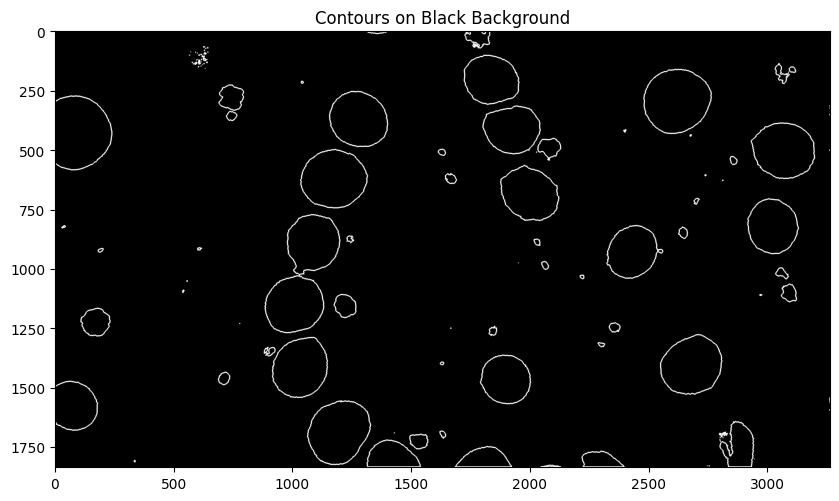

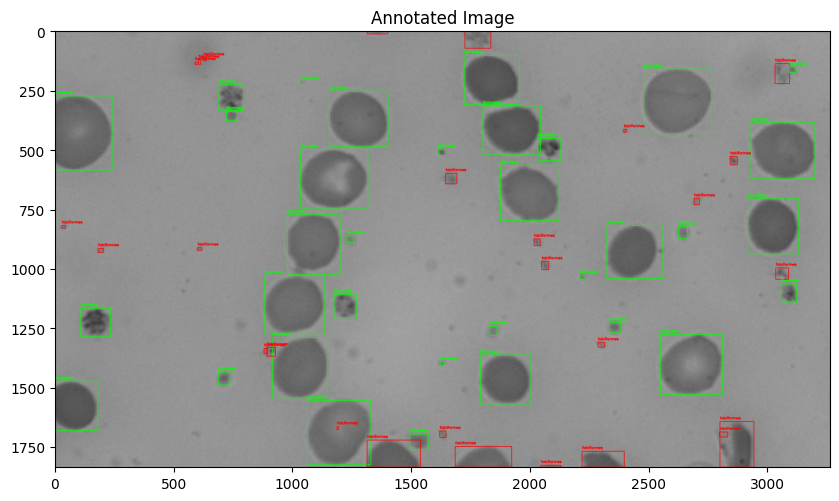

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.measure import label, regionprops
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Fonction pour extraire les caractéristiques des cellules
def extract_features(image, mask):
    labeled_mask = label(mask)
    properties = regionprops(labeled_mask)
    features = []
    labels = []

    for prop in properties:
        if prop.area > 50:  # Filtrer les petites régions
            aspect_ratio = prop.major_axis_length / prop.minor_axis_length
            circularity = (4 * np.pi * prop.area) / (prop.perimeter ** 2)
            eccentricity = prop.eccentricity

            # Ajouter les caractéristiques
            features.append([aspect_ratio, circularity, eccentricity])
            
            # Etiquette (0 pour circulaire, 1 pour allongée)
            if aspect_ratio < 1.2:
                labels.append(0)
            else:
                labels.append(1)
    
    return np.array(features), np.array(labels)

# Charger l'image
image_path = 'filtres/Filtre_Gaussienne/Opta-Tech_359.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Appliquer un seuillage binaire à l'image
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Inverser l'image binaire
inverted_image = cv2.bitwise_not(binary_image)

# Trouver les contours
contours, _ = cv2.findContours(inverted_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Créer une image noire vide
contour_image = np.zeros_like(inverted_image)

# Dessiner les contours en blanc sur l'image noire avec une épaisseur augmentée
cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 3)

# Label les régions
labeled_mask = label(inverted_image)

# Extraire les caractéristiques et les étiquettes
features, labels = extract_features(image, labeled_mask)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Entraîner le classificateur SVM
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = clf.predict(X_test)

# Afficher le rapport de classification
print(classification_report(y_test, y_pred))

# Annoter l'image originale
annotated_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

for prop in regionprops(labeled_mask):
    if prop.area > 50:  # Filtrer les petites régions
        aspect_ratio = prop.major_axis_length / prop.minor_axis_length
        circularity = (4 * np.pi * prop.area) / (prop.perimeter ** 2)
        eccentricity = prop.eccentricity
        
        # Prédire le type de cellule
        cell_type = clf.predict([[aspect_ratio, circularity, eccentricity]])[0]
        
        min_row, min_col, max_row, max_col = prop.bbox
        if cell_type == 0:
            color = (0, 255, 0)  # Vert pour les cellules circulaires
            label_text = 'Normales'
        else:
            color = (0, 0, 255)  # Rouge pour les cellules allongées
            label_text = 'falciformes '
        
        cv2.rectangle(annotated_image, (min_col, min_row), (max_col, max_row), color, 2)
        cv2.putText(annotated_image, label_text, (min_col, min_row - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Afficher l'image avec les contours
plt.figure(figsize=(10, 10))
plt.imshow(contour_image, cmap='gray')
plt.title('Contours on Black Background')
plt.show()

# Afficher l'image annotée
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.title('Annotated Image')
plt.show()
